Import libraries

In [88]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

import pickle

import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
df = pd.read_csv('/Users/gavinluo/Desktop/coding/project-Student-Preformance/student-preformance/student/student-mat.csv', sep = ';')

In [90]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [91]:
df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [92]:
# filtering dataset for select useful features
# splitting data into X and y
X = df[['G1', 'G2', 'studytime', 'absences', 'freetime', 'failures']]
y = df['G3']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.1, 
                                                   )

In [94]:
## regr = linear_model.LinearRegression()

In [95]:
## regr.fit(X_train, y_train)

In [96]:
with open("SPmodel.pickle", 'wb') as f:
    pickle.dump(regr, f)

pickle_in = open("SPmodel.pickle", 'rb')

regr = pickle.load(pickle_in)

In [97]:
y_hat = regr.predict(X_test)

# the coefficients
print("Coefficients: \n", regr.coef_)

print("Intercept: %.2f" % regr.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat))

print("Coefficient of determination: %.2f" % r2_score(y_test, y_hat))

print("Model score: %.2f" % regr.score(X_test, y_test))

Coefficients: 
 [ 0.15344652  0.97523536 -0.21209283  0.04428138  0.11096914 -0.31161993]
Intercept: -1.79
Mean squared error: 6.13
Coefficient of determination: 0.75
Model score: 0.75


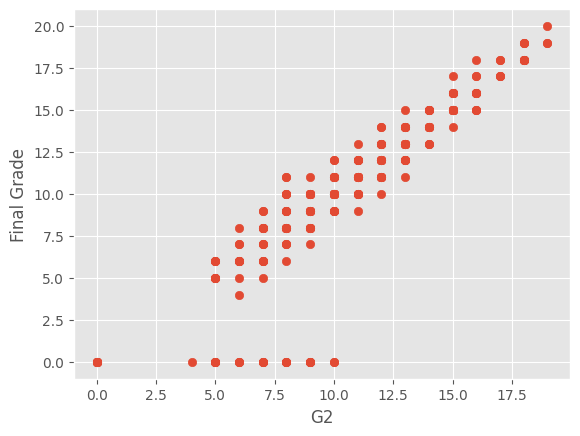

In [103]:
style.use("ggplot")

p = 'G2'

plt.scatter(df[p], df['G3'])

plt.xlabel(p)
plt.ylabel("Final Grade")

plt.show()

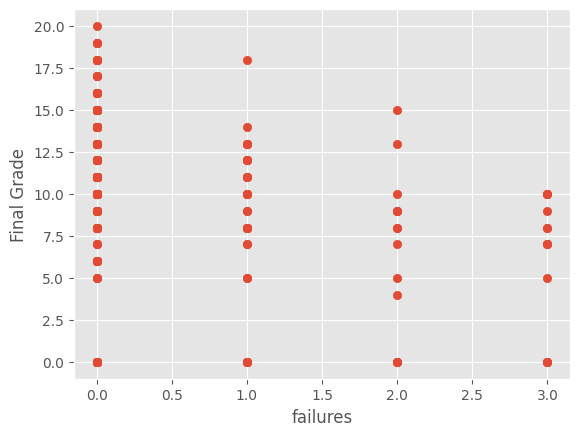

In [ ]:
style.use("ggplot")

p = 'failures'

plt.scatter(df[p], df['G3'])

plt.xlabel(p)
plt.ylabel("Final Grade")

plt.show()